In [2]:
import pandas as pd
import preprocessor as p
import re

In [3]:
data = pd.read_csv('/Users/mac/Desktop/Yale/courses/CBB 750/Project/Data/vaccine_labeled_tweets.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data

,Tweet,Nour_label
0,Zika virus vaccine shows promise for treatment...,0
1,A vaccine thanks to Donald Trump.,0
2,Australia begins production of Oxford-develope...,0
3,"Hey twitter! During quarantine, my dad wrote a...",0
4,@growthpundit @naomirwolf There is no such thi...,2
...,...,...
2118,"Yes, vaccines cause autism if you let black pe...",1
2119,Monday Motivation:\n\nToday is your opportunit...,0
2120,@JohnKel88765186 @TheAceCharles @BigMoFoJoe @R...,0
2121,Americans opt for change - https://t.co/P6V9Nq...,0


In [6]:
data = data.rename(columns={"Nour_label": "Label"})

In [7]:
data.isnull().sum()

Tweet    0
Label    0
dtype: int64

array([[<AxesSubplot:title={'center':'Label'}>]], dtype=object)

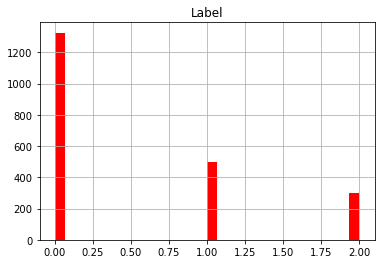

In [8]:
## Label distribution
data.hist(bins = 30, color = 'r')

In [9]:
data['Label'].value_counts()

0    1325
1     496
2     302
Name: Label, dtype: int64

In [10]:
#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")


def clean_tweets(df):
    tempArr = []
    for line in df:
        #send to tweet_processor
        tmpL = p.clean(line)
        #remove puctuation
        tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
        tempArr.append(tmpL)
    return tempArr

In [11]:
## Clean text data
data['Clean_tweet'] = clean_tweets(data['Tweet'])
data.head(6)

,Tweet,Label,Clean_tweet
0,Zika virus vaccine shows promise for treatment...,0,zika virus vaccine shows promise for treatment...
1,A vaccine thanks to Donald Trump.,0,a vaccine thanks to donald trump
2,Australia begins production of Oxford-develope...,0,australia begins production of oxford developed
3,"Hey twitter! During quarantine, my dad wrote a...",0,hey twitter during quarantine my dad wrote a b...
4,@growthpundit @naomirwolf There is no such thi...,2,there is no such thing as herd immunity unless...
5,RT @CBSNews: AstraZeneca says COVID-19 vaccine...,0,astrazeneca says covid 19 vaccine could arriv...


In [ ]:
## Train CountVectorizer using different grams and save models
for i in range(2, 6):
    tf_vectorizer = CountVectorizer(max_features=2500,
                                ngram_range=(1, i), 
                                stop_words='english')

    tf = tf_vectorizer.fit(data['Clean_tweet'])
    filename = '/Users/mac/Desktop/Yale/courses/CBB 750/Project/Models/'+'tf'+str(i)+'.sav'
    pickle.dump(tf, open(filename, 'wb'))